## Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part-Time
* Scheduled project review date/time: 9/2/21
* Instructor name: Claude Fried
* Blog post URL:


# Overview
Microsoft is looking to create a movie studio using the following movie datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

As a part of the Microsoft Film Analytics team, we are using our knowledge understand the given data to find which types of films are currently doing the best at the box office. 

## Business Problem
What type of films Microsoft should invest in to create a profitable and successful movie?

## Business Value

Many factors are considered into a production of a film. Funding, directors, genre, and ratings are highly regarded to avid movie goers. In order to maximize the success of Microsoft's movie production we will need to focus on the following questions:

- When is the best time to release a movie?
- Which genre generates the most profit?
- Does Production Budget correlate to a more Profitable Movie?

Once we gather our information we will determine the recommendations Microsoft needs to release a film that will catch the eye of the audience. 

# What can we find from the data given to us?
We need to follow certain steps in order to find valuable information from our data.
1. Load and explore the data
2. Sort out what data we should use - Data cleansing & Mining
3. Find the information we need to gain insights

## When is the best time to release a movie based on Profit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

%matplotlib inline

In [2]:
movie_budgets = 'tn.movie_budgets.csv.gz'

df_movie_budgets = pd.read_csv(f'zippedData/{movie_budgets}')
df_movie_budgets
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [3]:
def reformat_money(money):
    money = money.replace(',','')
    return int(money[1:])

df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].apply(reformat_money)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].apply(reformat_money)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].apply(reformat_money)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [4]:
# Create revenue and profit column
revenue = df_movie_budgets['domestic_gross'] + df_movie_budgets['worldwide_gross']
profit = revenue - df_movie_budgets['production_budget']

df_movie_budgets['revenue'] = revenue
df_movie_budgets['profit'] = profit

# df_movie_budgets['revenue'] = revenue
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [5]:
movie_release = df_movie_budgets.copy() #we're going to need a copy of this later
movie_release['month'] = movie_release['release_date'].str[:3] #change these into strings
movie_release['year'] = movie_release['release_date'].str[7:].astype(int)
movie_release = movie_release.drop_duplicates().dropna().loc[(movie_release!=0).all(1)] # goodbye Nans, zeros, and duplicates

movie_release

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,Dec,2017
...,...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,141715,134715,May,2006
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,1800,-5200,Dec,2004
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977,282977,Apr,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676,-2324,Jul,2005


In [6]:
rearrange_columns = list(movie_release.columns)
rearrange_columns[0],rearrange_columns[8] = rearrange_columns[8],rearrange_columns[0]
rearrange_columns[2],rearrange_columns[9] = rearrange_columns[9],rearrange_columns[2]
rearrange_columns

['month',
 'release_date',
 'year',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'revenue',
 'profit',
 'id',
 'movie']

In [7]:
movie_release = movie_release[rearrange_columns]
movie_release

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron
4,Dec,"Dec 15, 2017",2017,317000000,620181382,1316721747,1936903129,1619903129,5,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...,...,...,...
5775,May,"May 26, 2006",2006,7000,70071,71644,141715,134715,76,Cavite
5776,Dec,"Dec 31, 2004",2004,7000,900,900,1800,-5200,77,The Mongol King
5778,Apr,"Apr 2, 1999",1999,6000,48482,240495,288977,282977,79,Following
5779,Jul,"Jul 13, 2005",2005,5000,1338,1338,2676,-2324,80,Return to the Land of Wonders


In [8]:
movie_release_years = movie_release['year'].value_counts(ascending = False) # frequency
# movie_release_years = movie_release['year'].sort_values(ascending=False) # min year 1915 max year 2020
movie_release_years

2006    247
2010    246
2008    239
2011    227
2005    214
       ... 
1947      1
1934      1
1958      1
1935      1
1916      1
Name: year, Length: 92, dtype: int64

Text(0.5, 1.0, 'Frequency of Movies Released by Years')

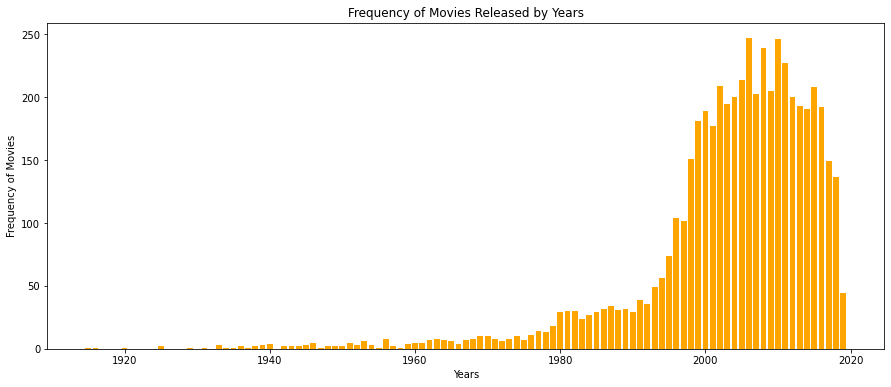

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(movie_release_years.index,movie_release_years, color='Orange')
ax.set_xlabel('Years');
ax.set_ylabel('Frequency of Movies')
ax.set_title('Frequency of Movies Released by Years')

Lets look at movies that were released from 2009 to 2019. Not many movies were released in 2020 because of COVID.

In [10]:
movie_release_10years = movie_release[movie_release['year'] >= 2009]
movie_release_10years

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron
4,Dec,"Dec 15, 2017",2017,317000000,620181382,1316721747,1936903129,1619903129,5,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...,...,...,...
5737,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,Krisha
5740,Oct,"Oct 15, 2010",2010,30000,9812,9812,19624,-10376,41,Down Terrace
5744,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily
5760,Apr,"Apr 2, 2010",2010,15000,115592,115592,231184,216184,61,Breaking Upwards


In [11]:
# create a dataframe from month and profit
# profit_by_month = movie_release_10years[['month','profit']]
# genres_by_month_total = movie_release_10years.sort_values('profit',ascending=False)
Total_by_month = movie_release_10years.groupby(['month']).profit.sum()
Total_by_month

month
Apr    18728675148
Aug    16191285586
Dec    36895039342
Feb    18469315515
Jan    11030612629
Jul    33076967720
Jun    34725658063
Mar    23959256445
May    33066662834
Nov    36185606279
Oct    15470826032
Sep    12801290611
Name: profit, dtype: int64

C:\Users\myrna\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit Total (In Billions)')

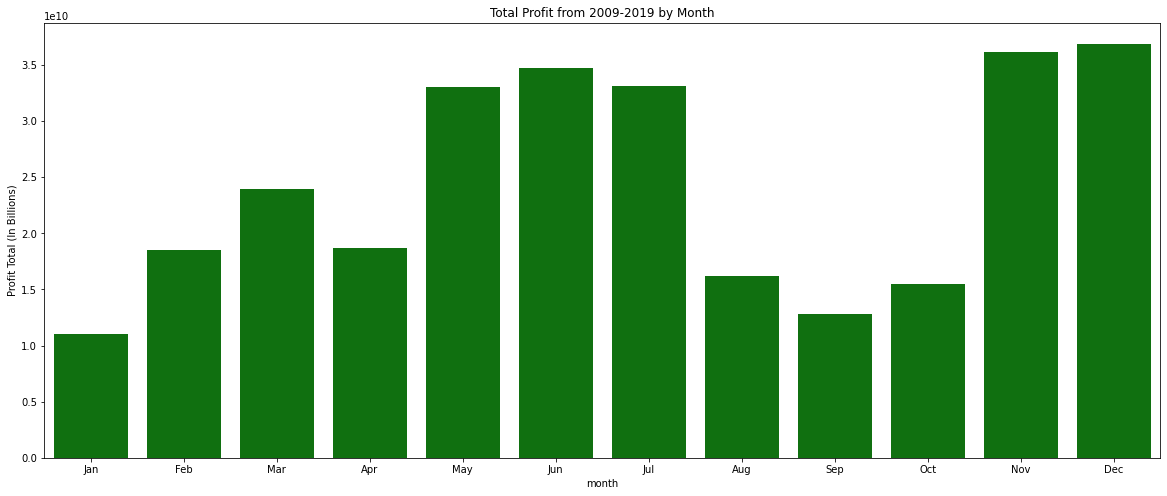

In [12]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(20,8))
data = Total_by_month
genre = data.index 
total = data.values
# create bar chart 
sns.barplot(genre, total, order=Months, color='green' ) # list the months in order list
# set title and labels 
ax.set_title('Total Profit from 2009-2019 by Month') 
ax.set_ylabel('Profit Total (In Billions)')
# arrange by order of months

Overall the months that made the most profit from the years 2009-2019 is December, November, June, July and May.

## What genre generates the most Profit?

In [13]:
# Moving on to genres lets load IMDB
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [14]:
# check for no null-values
imbd_title_data.info()
imbd_title_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [15]:
imbd_title_data = imbd_title_data.drop(["original_title", "runtime_minutes", "tconst", "start_year"], axis = 1) # drop the missing values
imbd_title_data.dropna(inplace=True) # drop missing value genres
imbd_title_data = imbd_title_data.rename(columns={"primary_title": "movie"}) # rename column for later merge
imbd_title_data.isna().sum()
imbd_title_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   movie   140736 non-null  object
 1   genres  140736 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [16]:
# Hello new clean data
imbd_title_data

,movie,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146138,The Secret of China,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy


In [17]:
#lets stick to 10 years we got something good going on
# merge movie & genre to 10 years worth of movies
imbd_movie_budget_10 = movie_release_10years.merge(imbd_title_data, how='inner')
imbd_movie_budget_10

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie,genres
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar,Horror
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,Apr,"Apr 27, 2018",2018,300000000,678815482,2048134200,2726949682,2426949682,7,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2205,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,Krisha,Drama
2206,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily,Drama
2207,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily,Drama
2208,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily,Documentary


In [18]:
imbd_movie_budget_10.loc[imbd_movie_budget_10.duplicated(keep=False),:] # visualize all the duplicates there are 197 duplicated rows

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie,genres
115,Mar,"Mar 17, 2017",2017,160000000,504014165,1259199706,1763213871,1603213871,35,Beauty and the Beast,"Family,Fantasy,Musical"
116,Mar,"Mar 17, 2017",2017,160000000,504014165,1259199706,1763213871,1603213871,35,Beauty and the Beast,"Family,Fantasy,Musical"
174,Mar,"Mar 27, 2015",2015,130000000,177397510,385997896,563395406,433395406,44,Home,Drama
176,Mar,"Mar 27, 2015",2015,130000000,177397510,385997896,563395406,433395406,44,Home,Drama
179,Mar,"Mar 27, 2015",2015,130000000,177397510,385997896,563395406,433395406,44,Home,Drama
...,...,...,...,...,...,...,...,...,...,...,...
2174,Jun,"Jun 6, 2014",2014,250000,18823,18823,37646,-212354,89,Test,Drama
2175,Jun,"Jun 6, 2014",2014,250000,18823,18823,37646,-212354,89,Test,Drama
2176,Jun,"Jun 6, 2014",2014,250000,18823,18823,37646,-212354,89,Test,Drama
2206,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily,Drama


In [19]:
imbd_movie_budget_10.duplicated(keep=False).value_counts()# sanity check for duplicated movie titles
imbd_movie_budget_10 = imbd_movie_budget_10.drop_duplicates(keep=False)
imbd_movie_budget_10

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie,genres
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar,Horror
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,Apr,"Apr 27, 2018",2018,300000000,678815482,2048134200,2726949682,2426949682,7,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2203,Jul,"Jul 31, 2015",2015,50000,8374,8374,16748,-33252,20,Counting,Documentary
2204,Feb,"Feb 11, 2011",2011,40000,3632,3632,7264,-32736,32,Raymond Did It,Horror
2205,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,Krisha,Drama
2208,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily,Documentary


In [20]:
# clean the the genres with strings, create a column for each genre by using fillna
genre_lst_dct = imbd_movie_budget_10['genres'].apply(lambda x: x.split(',')).apply(lambda y:{genre_values:1 for genre_values in y}).values
genre_lst_dct
genre_fill = pd.DataFrame(list(genre_lst_dct)).fillna(0)
genre_fill

,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,...,History,Documentary,Musical,Romance,Mystery,Biography,Sport,War,Music,News
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# link imbd_movie_budget_10 and genre_fill together
# reset index for imbd_movie_budget_10
new_genres_df = pd.concat([imbd_movie_budget_10.reset_index(), genre_fill], axis=1)
new_genres_df

,index,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,...,History,Documentary,Musical,Romance,Mystery,Biography,Sport,War,Music,News
0,0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Apr,"Apr 27, 2018",2018,300000000,678815482,2048134200,2726949682,2426949682,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2203,Jul,"Jul 31, 2015",2015,50000,8374,8374,16748,-33252,20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,2204,Feb,"Feb 11, 2011",2011,40000,3632,3632,7264,-32736,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,2205,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,2208,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# copying & pasting purpose
x = new_genres_df.columns[12:34]
x

Index(['Horror', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Western', 'Animation', 'Comedy', 'Family', 'Crime', 'Drama', 'History',
       'Documentary', 'Musical', 'Romance', 'Mystery', 'Biography', 'Sport',
       'War', 'Music', 'News'],
      dtype='object')

In [23]:
# double checking Horror average
new_genres_df[new_genres_df[x[0]] == 1]['profit'].mean()

107071183.60352422

In [24]:
# create dataframe by setting the variables by the genre_fill column and iterating through the genre columns

genre_column = genre_fill.columns
genre_average = []
genre_median = []
profit_sum = []
genre_total = []
for value in genre_column:
    genre_average.append(new_genres_df[new_genres_df[value] == 1]['profit'].mean())
    genre_median.append(new_genres_df[new_genres_df[value] == 1]['profit'].median())
    profit_sum.append(new_genres_df[new_genres_df[value] == 1]['profit'].sum())
    genre_total.append(new_genres_df[new_genres_df[value] == 1]['profit'].count())

In [25]:
genre_data = {'Total Genre Profit': profit_sum, 'Genre Profit Average': genre_average, 
              'Genre Median': genre_median, 'Number of Genres': genre_total} # create the columns
genre_statistics = pd.DataFrame(genre_data, index=genre_column) # generate the dataframe
genre_statistics.index.name = 'Genres' # set the index to Genres
genre_statistics 

,Total Genre Profit,Genre Profit Average,Genre Median,Number of Genres
Genres,,,,
Horror,24305158678,1.070712e+08,50516052.0,227
Action,117028565863,2.388338e+08,98631570.0,490
Adventure,133589611026,3.543491e+08,202761602.0,377
Fantasy,34774782871,2.414915e+08,83145953.0,144
Sci-Fi,52469355917,3.497957e+08,156603643.0,150
Thriller,40396563811,1.216764e+08,49795982.0,332
Western,1044827172,7.463051e+07,-2503123.0,14
Animation,45256551079,4.040763e+08,295417664.0,112
Comedy,86328738725,1.458256e+08,67330650.0,592


In [26]:
genres_by_average_sort = genre_statistics.sort_values('Genre Profit Average',ascending=False)
genres_by_average = genres_by_average_sort['Genre Profit Average']
genres_by_average

Genres
Animation      4.040763e+08
Adventure      3.543491e+08
Sci-Fi         3.497957e+08
Fantasy        2.414915e+08
Action         2.388338e+08
Musical        2.104060e+08
Family         1.907997e+08
Comedy         1.458256e+08
Thriller       1.216764e+08
Sport          1.178745e+08
Horror         1.070712e+08
Documentary    1.015839e+08
Mystery        1.007403e+08
History        1.001281e+08
Music          9.899329e+07
Biography      9.236039e+07
Romance        9.024303e+07
Crime          8.448598e+07
Drama          8.394597e+07
Western        7.463051e+07
War            4.791002e+07
News           3.479181e+07
Name: Genre Profit Average, dtype: float64

Text(0, 0.5, 'Profit Average (In Billions)')

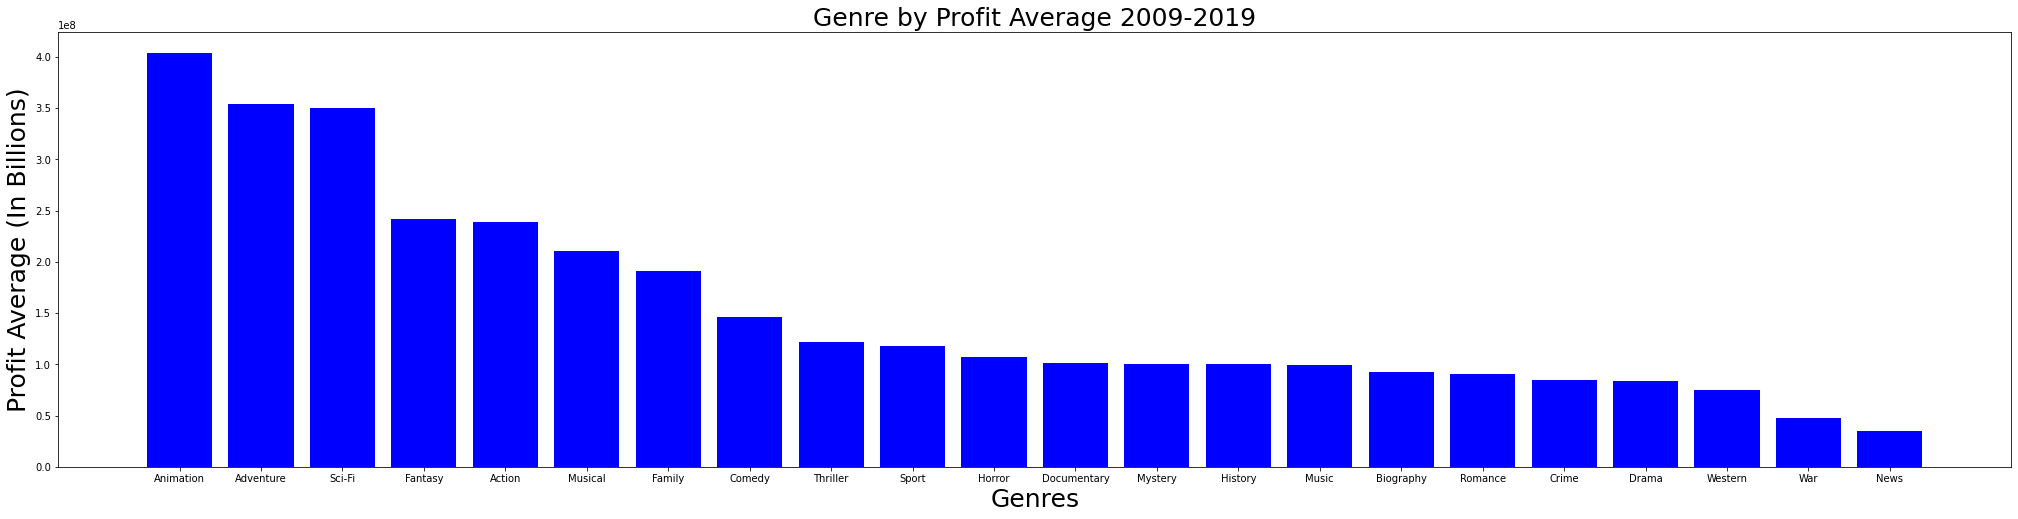

In [27]:
fig, ax = plt.subplots(figsize=(35,8))
data = genres_by_average
genre = genres_by_average.index
average = genres_by_average.values
# create bar chart 
ax.bar(genre, average, color = 'blue') 
# set title and labels 
ax.set_title('Genre by Profit Average 2009-2019',fontsize=25) 
ax.set_xlabel('Genres',fontsize=25)
ax.set_ylabel('Profit Average (In Billions)',fontsize=25)


The highest genre profit average in 2009-2019 is Animation, Adventure, Sci-fi, Fantasy and Action.

## Does production budget correlate to Profit?

In [28]:
#let go of all the negative profit
imbd_movie_budget = movie_release_10years.loc[movie_release_10years['profit'] > 0] # reformat
imbd_movie_budget

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron
4,Dec,"Dec 15, 2017",2017,317000000,620181382,1316721747,1936903129,1619903129,5,Star Wars Ep. VIII: The Last Jedi
5,Dec,"Dec 18, 2015",2015,306000000,936662225,2053311220,2989973445,2683973445,6,Star Wars Ep. VII: The Force Awakens
...,...,...,...,...,...,...,...,...,...,...
5717,Nov,"Nov 12, 2010",2010,50000,391674,424149,815823,765823,18,Tiny Furniture
5730,Mar,"Mar 12, 2010",2010,40000,25572,25572,51144,11144,31,The Exploding Girl
5737,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,Krisha
5760,Apr,"Apr 2, 2010",2010,15000,115592,115592,231184,216184,61,Breaking Upwards


0.7017622355638661

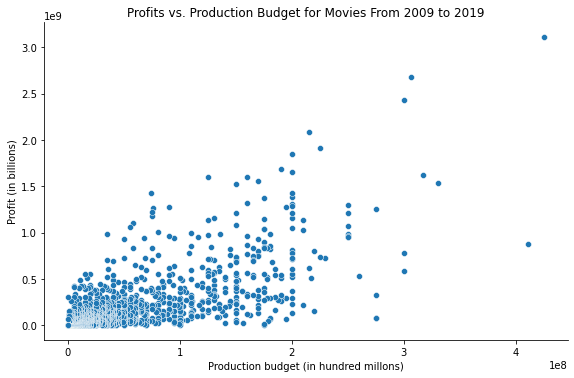

In [29]:
#plot the correlation between worldwide profits and production budget
fig, ax = plt.subplots(figsize=(8,5))
plt.tight_layout()
sns.scatterplot(data=imbd_movie_budget, x='production_budget', y='profit',palette='crest')
ax.set(title='Profits vs. Production Budget for Movies From 2009 to 2019',
    xlabel='Production budget (in hundred millions)',
    ylabel='Profit (in billions)')
sns.despine(fig=fig,top=True,right=True)

imbd_movie_budget['production_budget'].corr(imbd_movie_budget['profit'])

Worldwide Gross Profit and Production has a positive correction of 0.702. We can assume movies with a higher production budget will generate more profit.

In [30]:
imbd_movie_budget.describe()

,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id
count,1562.000000,1.562000e+03,1.562000e+03,1.562000e+03,1.562000e+03,1.562000e+03,1562.000000
mean,2013.363636,4.962699e+07,6.796561e+07,1.700880e+08,2.380536e+08,1.884266e+08,50.649168
std,2.915141,5.794225e+07,9.115948e+07,2.517689e+08,3.386375e+08,2.954505e+08,28.648723
min,2009.000000,9.000000e+03,4.091000e+03,4.584000e+03,9.168000e+03,1.680000e+02,1.000000
25%,2011.000000,1.000000e+07,1.444124e+07,2.987570e+07,4.479010e+07,2.582571e+07,26.000000
50%,2013.000000,2.850000e+07,3.768607e+07,7.738891e+07,1.187854e+08,8.263468e+07,51.000000
75%,2016.000000,6.300000e+07,8.354033e+07,1.976083e+08,2.832497e+08,2.175058e+08,75.000000
max,2019.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09,100.000000


In [31]:
imbd_movie_profit_avg = imbd_movie_budget['profit'].mean()
imbd_movie_profit_med = imbd_movie_budget['profit'].median()
imbd_movie_budget_prod_avg = imbd_movie_budget['production_budget'].mean()
imbd_movie_budget_prod_med = imbd_movie_budget['production_budget'].median()

print("Profit average is", imbd_movie_profit_avg)
print("Profit median is", imbd_movie_profit_med)
print("Production Budget average is", imbd_movie_budget_prod_avg)
print("Production Budget median is", imbd_movie_budget_prod_med)

Profit average is 188426603.22087067
Profit median is 82634675.0
Production Budget average is 49626994.65428937
Production Budget median is 28500000.0


It's hard to rely on the the average for both because the median is smaller than the the average meaning that the data is skewed. So we should stick with the median for both variables.

# Conclusion

Given from our findings, the best recommendations I could give is are the following:

1. Release Movies during the end of the year and summer time such as - May, June, July, November, December
2. The genres to consider writing is Animated Movies, Adventure, Sci-fi, Fantasy and Action based on the highest profiting average.
3. 200M-300M Budget will provide a profitable Movie. 

## Insights to explore in the Future

1. Profits of movies from streaming platforms
2. Highly Rated Directors
3. Dig Deeper into Production Budget Ranges vs. Profitability %
4. High Rated Movie Studio's/Competition's Profits and Revenue
5. How Does Popularity Correlate to Most Frequently Watched Genres